In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [42]:
solar_data = pd.read_csv('data/solarpower.csv')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [43]:
#task 3.1
index = solar_data.index.tolist()
for i in index:
    if solar_data.iloc[i,1]==-1:
        solar_data.iloc[i,1]=(solar_data.iloc[i-1,1]+solar_data.iloc[i+1,1])/2
display(round(solar_data['cum_power'].mean()))
        
        

23848

In [44]:
solar_data['date'] = pd.to_datetime(solar_data['date'])
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [45]:
#task 3.2
solar_data['day_power']=solar_data['cum_power'].diff()
solar_data.head()

,date,cum_power,day_power
0,2017-01-01,20111.0,NaN
1,2017-01-02,20112.0,1.0
2,2017-01-03,20115.0,3.0
3,2017-01-04,20117.0,2.0
4,2017-01-05,20119.0,2.0


In [46]:
solar_data['period'] = solar_data['date'].dt.to_period('M')
solar_data.head()

,date,cum_power,day_power,period
0,2017-01-01,20111.0,NaN,2017-01
1,2017-01-02,20112.0,1.0,2017-01
2,2017-01-03,20115.0,3.0,2017-01
3,2017-01-04,20117.0,2.0,2017-01
4,2017-01-05,20119.0,2.0,2017-01


In [48]:
plot_data=solar_data.groupby('period')['day_power'].mean()
display(plot_data)

period
2017-01     3.233333
2017-02     3.714286
2017-03    10.774194
2017-04    16.300000
2017-05    19.000000
2017-06    21.500000
2017-07    18.129032
2017-08    15.064516
2017-09    11.533333
2017-10     6.419355
2017-11     3.233333
2017-12     1.161290
2018-01     2.064516
2018-02     6.928571
2018-03     8.709677
2018-04    14.633333
2018-05    21.032258
2018-06    18.766667
2018-07    22.000000
2018-08    17.096774
2018-09    13.866667
2018-10     9.000000
Freq: M, Name: day_power, dtype: float64

<AxesSubplot:title={'center':'Средняя ежедневная выработка энергии'}, xlabel='period'>

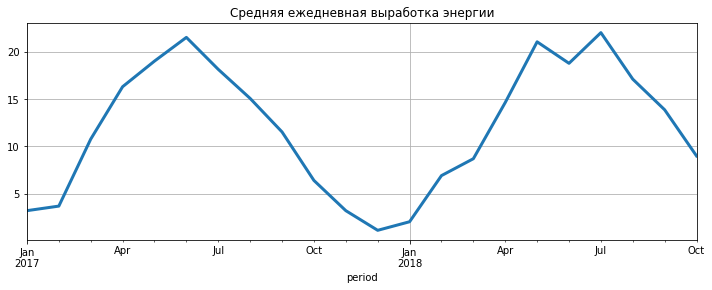

In [49]:
#task 3.3
plot_data.plot(
    kind='line',
    figsize=(12, 4),
    title='Средняя ежедневная выработка энергии',
    grid = True,
    lw=3
)